In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("../data/raw/1-3_rooms_2025-05-26_19-51.csv")
df

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,Alpha Star Properties,real_estate_agent,https://www.cian.ru/sale/flat/315745436/,Москва,sale,flat,25,61,1,60.0,-1,0,75000000,Пресненский,Краснопресненская набережная,14Ак1,Москва-Сити,Capital Towers
1,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/313640113/,Москва,sale,flat,6,41,1,40.1,-1,0,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
2,Место,real_estate_agent,https://www.cian.ru/sale/flat/317943780/,Москва,sale,flat,2,9,1,32.7,-1,0,10700000,Богородское,Краснобогатырская,75К1,Преображенская площадь,NaN
3,Татьяна Серебрякова,realtor,https://www.cian.ru/sale/flat/314672030/,Москва,sale,flat,14,16,1,40.0,-1,0,12700000,Марьино,Новомарьинская,16К1,Братиславская,NaN
4,ZAPAD REALTY - офис Маршала Жукова,real_estate_agent,https://www.cian.ru/sale/flat/317810772/,Москва,sale,flat,13,41,1,43.1,-1,0,21500000,Хорошево-Мневники,Шелепихинская набережная,34к5,Шелепиха,Сердце Столицы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,Point Estate Город,real_estate_agent,https://www.cian.ru/sale/flat/314928229/,Москва,sale,flat,5,10,3,131.0,-1,0,131000000,Тверской,Большая Грузинская,69,Белорусская,Четыре Ветра
389,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/317700971/,Москва,sale,flat,2,41,3,65.5,-1,0,63000000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
390,Intermark Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/308136515/,Москва,sale,flat,6,12,3,120.9,-1,0,72200000,Мещанский,Протопоповский переулок,17С2,Проспект Мира,NaN
391,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/315261338/,Москва,sale,flat,5,10,3,131.0,-1,0,131000000,Тверской,Большая Грузинская,69,Белорусская,Четыре Ветра


In [3]:
df.columns

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price_per_month', 'commissions', 'price', 'district',
       'street', 'house_number', 'underground', 'residential_complex'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               393 non-null    object 
 1   author_type          393 non-null    object 
 2   url                  393 non-null    object 
 3   location             393 non-null    object 
 4   deal_type            393 non-null    object 
 5   accommodation_type   393 non-null    object 
 6   floor                393 non-null    int64  
 7   floors_count         393 non-null    int64  
 8   rooms_count          393 non-null    int64  
 9   total_meters         393 non-null    float64
 10  price_per_month      393 non-null    int64  
 11  commissions          393 non-null    int64  
 12  price                393 non-null    int64  
 13  district             370 non-null    object 
 14  street               389 non-null    object 
 15  house_number         387 non-null    obj

In [26]:
df.nunique()

author                 176
author_type              5
url                    420
location                 1
deal_type                1
accommodation_type       1
floor                   38
floors_count            48
rooms_count              3
total_meters           265
price_per_month          1
commissions              1
price                  288
district                97
street                 268
house_number           224
underground            176
residential_complex    124
dtype: int64

Удалим константные столбцы, и столбцы содержащие все уникальные значениям (url)

In [5]:
df.drop(['location', 'deal_type', 'accommodation_type', 'price_per_month', 'commissions', 'url'], axis=1, inplace=True)

In [6]:
df

,author,author_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,Alpha Star Properties,real_estate_agent,25,61,1,60.0,75000000,Пресненский,Краснопресненская набережная,14Ак1,Москва-Сити,Capital Towers
1,White and Broughton,real_estate_agent,6,41,1,40.1,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
2,Место,real_estate_agent,2,9,1,32.7,10700000,Богородское,Краснобогатырская,75К1,Преображенская площадь,NaN
3,Татьяна Серебрякова,realtor,14,16,1,40.0,12700000,Марьино,Новомарьинская,16К1,Братиславская,NaN
4,ZAPAD REALTY - офис Маршала Жукова,real_estate_agent,13,41,1,43.1,21500000,Хорошево-Мневники,Шелепихинская набережная,34к5,Шелепиха,Сердце Столицы
...,...,...,...,...,...,...,...,...,...,...,...,...
388,Point Estate Город,real_estate_agent,5,10,3,131.0,131000000,Тверской,Большая Грузинская,69,Белорусская,Четыре Ветра
389,Whitewill,real_estate_agent,2,41,3,65.5,63000000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
390,Intermark Real Estate,real_estate_agent,6,12,3,120.9,72200000,Мещанский,Протопоповский переулок,17С2,Проспект Мира,NaN
391,Whitewill,real_estate_agent,5,10,3,131.0,131000000,Тверской,Большая Грузинская,69,Белорусская,Четыре Ветра


In [7]:
df.isna().sum()

author                   0
author_type              0
floor                    0
floors_count             0
rooms_count              0
total_meters             0
price                    0
district                23
street                   4
house_number             6
underground              5
residential_complex    170
dtype: int64

Удалим столбцы-имена собственные:

In [8]:
df.drop(['author', 'author_type', 'residential_complex'], axis=1, inplace=True)

In [9]:
df

,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground
0,25,61,1,60.0,75000000,Пресненский,Краснопресненская набережная,14Ак1,Москва-Сити
1,6,41,1,40.1,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт
2,2,9,1,32.7,10700000,Богородское,Краснобогатырская,75К1,Преображенская площадь
3,14,16,1,40.0,12700000,Марьино,Новомарьинская,16К1,Братиславская
4,13,41,1,43.1,21500000,Хорошево-Мневники,Шелепихинская набережная,34к5,Шелепиха
...,...,...,...,...,...,...,...,...,...
388,5,10,3,131.0,131000000,Тверской,Большая Грузинская,69,Белорусская
389,2,41,3,65.5,63000000,Хорошевский,Ленинградский проспект,37/5,Аэропорт
390,6,12,3,120.9,72200000,Мещанский,Протопоповский переулок,17С2,Проспект Мира
391,5,10,3,131.0,131000000,Тверской,Большая Грузинская,69,Белорусская


Посмотрим на распределение цены:

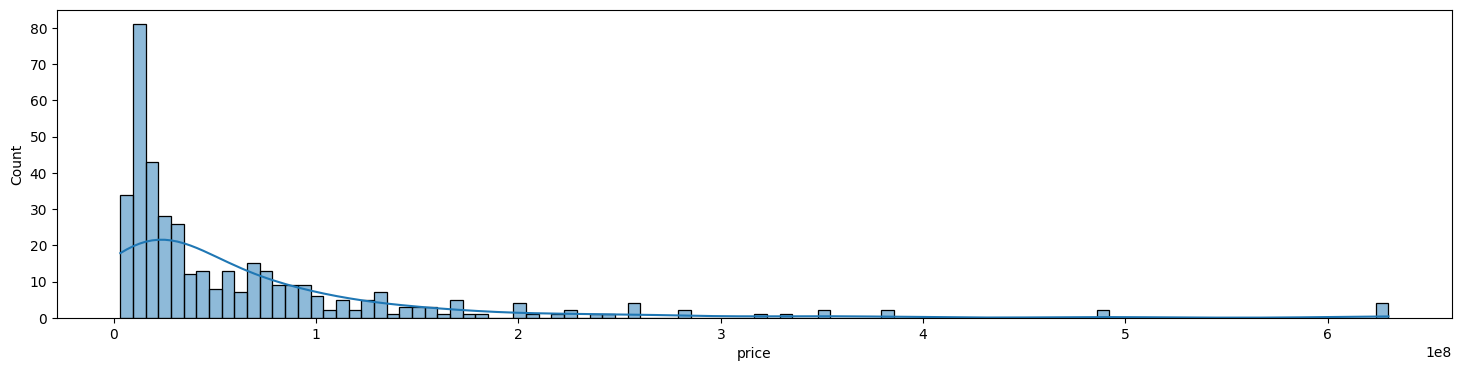

In [10]:
fig = plt.figure(figsize=(18, 4))
sns.histplot(df['price'], kde=True, bins=100);

Распределение комнатности квартир:

In [11]:
df['rooms_count'].value_counts()

rooms_count
2    140
1    133
3    120
Name: count, dtype: int64

Достаточно равномерно

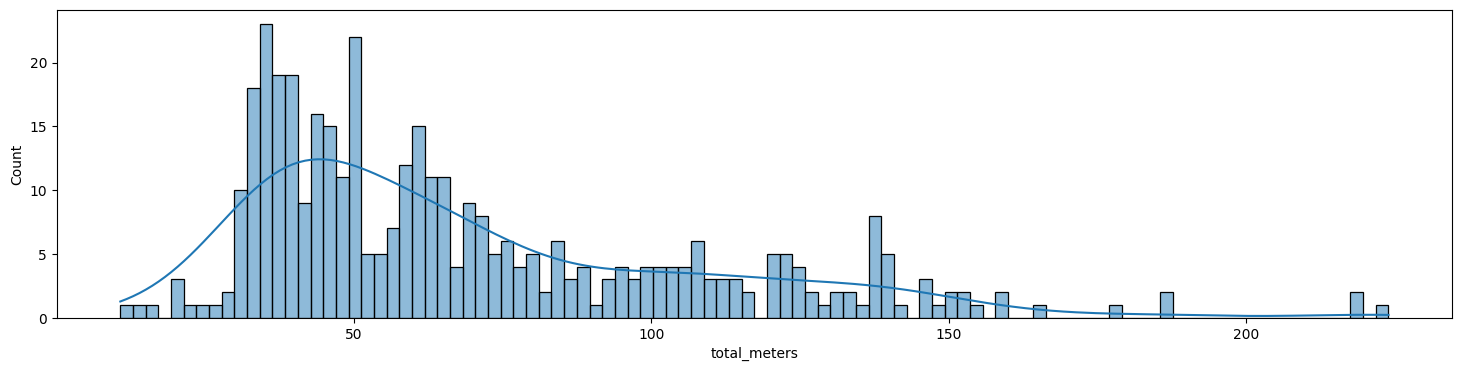

In [12]:
fig = plt.figure(figsize=(18, 4))
sns.histplot(df['total_meters'], kde=True, bins=100);

Посмотрим на выбросы в цене и в метрах:

In [13]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [14]:
need_columns = ['total_meters', 'price']
for column in need_columns:
    print(detect_outliers(df[[column]],column).drop_duplicates())

Empty DataFrame
Columns: [total_meters]
Index: []
         price
148  630000000
180  350000000
220  380000000
294  279000000
307  488786625
315  349000000
324  317000000
330  280000000
332  335000000


In [15]:
def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

In [16]:
clean_df = df
for column in need_columns:
    clean_df = drop_outliers(clean_df, column)

In [17]:
clean_df

,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground
0,25,61,1,60.0,75000000,Пресненский,Краснопресненская набережная,14Ак1,Москва-Сити
1,6,41,1,40.1,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт
2,2,9,1,32.7,10700000,Богородское,Краснобогатырская,75К1,Преображенская площадь
3,14,16,1,40.0,12700000,Марьино,Новомарьинская,16К1,Братиславская
4,13,41,1,43.1,21500000,Хорошево-Мневники,Шелепихинская набережная,34к5,Шелепиха
...,...,...,...,...,...,...,...,...,...
388,5,10,3,131.0,131000000,Тверской,Большая Грузинская,69,Белорусская
389,2,41,3,65.5,63000000,Хорошевский,Ленинградский проспект,37/5,Аэропорт
390,6,12,3,120.9,72200000,Мещанский,Протопоповский переулок,17С2,Проспект Мира
391,5,10,3,131.0,131000000,Тверской,Большая Грузинская,69,Белорусская


После удаления выбросов осталось 354 квартиры

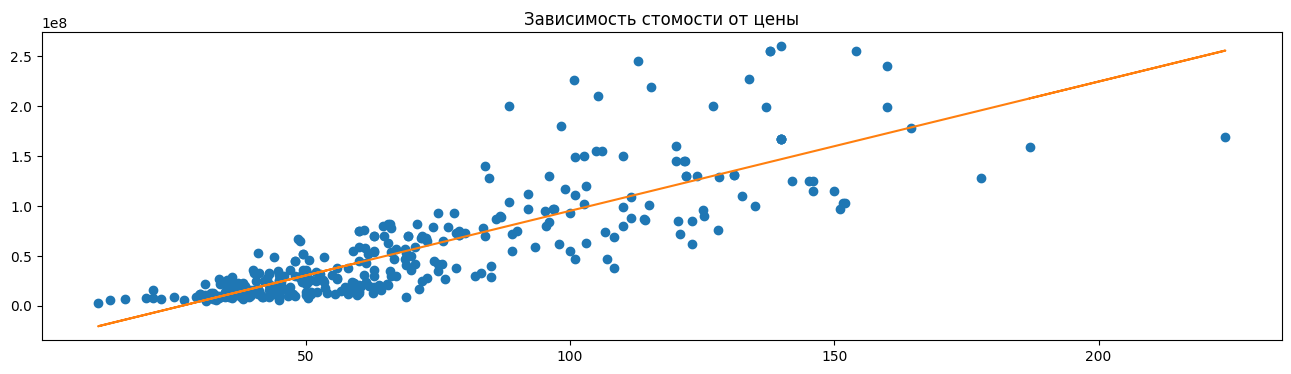

In [18]:
fig = plt.figure(figsize=(16, 4))
x = clean_df['total_meters']
y = clean_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
plt.title('Зависимость стомости от цены')
plt.plot(x, m*x+b);

In [20]:
clean_df.to_csv("../data/processed/clean_flat_data.csv")